In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os



In [95]:
#from google.colab import drive
#drive.mount('/content/drive')


In [96]:
bene_path = "DE1_0_2009_Beneficiary_Summary_File_Sample_20.csv"
out_path  = "DE1_0_2008_to_2010_Outpatient_Claims_Sample_20.csv"

# Check files exist
if not os.path.exists(bene_path):
    raise FileNotFoundError("Beneficiary file not found. Check Drive path.")

if not os.path.exists(out_path):
    raise FileNotFoundError("Outpatient file not found. Check Drive path.")

# Load data
bene = pd.read_csv(bene_path)
out  = pd.read_csv(out_path, low_memory=False)

print("bene:", bene.shape)
print("out :", out.shape)

bene.head()

bene: (114641, 32)
out : (790044, 76)


,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,19190701,NaN,2,2,0,5,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,19360501,NaN,1,1,0,11,530,12,12,...,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,19310401,NaN,2,1,0,34,120,12,12,...,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,19420501,NaN,2,2,0,11,190,12,12,...,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,19350401,NaN,2,1,0,23,720,12,12,...,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [97]:
date_cols_bene = ["BENE_BIRTH_DT", "BENE_DEATH_DT"]

for c in date_cols_bene:
    bene[c] = pd.to_datetime(
        bene[c],
        format="%Y%m%d",
        errors="coerce"
    )

date_cols_out = ["CLM_FROM_DT", "CLM_THRU_DT"]

for c in date_cols_out:
    out[c] = pd.to_datetime(
        out[c],
        format="%Y%m%d",
        errors="coerce"
    )




In [98]:
bene.head()

,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,...,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,000002F7E0A96C32,1919-07-01,NaT,2,2,0,5,400,0,0,...,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00001C24EE7B06AC,1936-05-01,NaT,1,1,0,11,530,12,12,...,2,0.0,0.0,0.0,200.0,40.0,0.0,800.0,260.0,0.0
2,000072CF62193213,1931-04-01,NaT,2,1,0,34,120,12,12,...,2,0.0,0.0,0.0,130.0,70.0,0.0,440.0,30.0,50.0
3,0000DCD33779ED8A,1942-05-01,NaT,2,2,0,11,190,12,12,...,2,0.0,0.0,0.0,90.0,20.0,0.0,930.0,200.0,0.0
4,0000F1EB530967F3,1935-04-01,NaT,2,1,0,23,720,12,12,...,2,0.0,0.0,0.0,70.0,200.0,0.0,4950.0,1340.0,0.0


In [99]:
bene["age"] = 2009 - bene["BENE_BIRTH_DT"].dt.year


In [100]:
bene[["BENE_BIRTH_DT","age"]].head(10)


,BENE_BIRTH_DT,age
0,1919-07-01,90
1,1936-05-01,73
2,1931-04-01,78
3,1942-05-01,67
4,1935-04-01,74
5,1941-08-01,68
6,1943-10-01,66
7,1943-09-01,66
8,1942-09-01,67
9,1943-12-01,66


In [101]:

out["AT_PHYSN_NPI"] = out["AT_PHYSN_NPI"].astype("Int64")

present_out = out[[
    "DESYNPUF_ID",
    "CLM_FROM_DT",
    "CLM_THRU_DT",
    "CLM_PMT_AMT",
    "AT_PHYSN_NPI"
]].copy()


present_out["CLM_PMT_AMT"] = present_out["CLM_PMT_AMT"].map("{:,.0f}".format)

present_out.head()


,DESYNPUF_ID,CLM_FROM_DT,CLM_THRU_DT,CLM_PMT_AMT,AT_PHYSN_NPI
0,00001C24EE7B06AC,2009-04-04,2009-04-04,200,1298826910
1,00001C24EE7B06AC,2010-03-10,2010-03-10,500,1298826910
2,000072CF62193213,2008-01-30,2008-01-30,50,8929521324
3,000072CF62193213,2008-03-01,2008-03-01,70,8382687693
4,000072CF62193213,2008-03-22,2008-03-22,40,4404237062


In [102]:
bene[["DESYNPUF_ID","BENE_RACE_CD"]].isna().mean()
out[["DESYNPUF_ID","AT_PHYSN_NPI","CLM_PMT_AMT"]].isna().mean()


,0
DESYNPUF_ID,0.000000
AT_PHYSN_NPI,0.022075
CLM_PMT_AMT,0.000000


In [103]:
chronic_cols = [
    "SP_ALZHDMTA","SP_CHF","SP_CHRNKIDN","SP_CNCR","SP_COPD",
    "SP_DEPRESSN","SP_DIABETES","SP_ISCHMCHT","SP_OSTEOPRS","SP_RA_OA","SP_STRKETIA"
]

pretty = {
    "SP_ALZHDMTA":"Alzheimer",
    "SP_CHF":"CHF",
    "SP_CHRNKIDN":"Chronic Kidney",
    "SP_CNCR":"Cancer",
    "SP_COPD":"COPD",
    "SP_DEPRESSN":"Depression",
    "SP_DIABETES":"Diabetes",
    "SP_ISCHMCHT":"Ischemic Heart",
    "SP_OSTEOPRS":"Osteoporosis",
    "SP_RA_OA":"RA/OA",
    "SP_STRKETIA":"Stroke/TIA",
}


In [104]:
def chronic_combo(row):
    yes = [pretty[c] for c in chronic_cols if row[c] == 1]

    if len(yes) == 0:
        return "None"
    elif len(yes) >= 3:
        return "Multiple"
    else:
        return " + ".join(yes)



In [105]:
bene["chronic_combo"] = bene.apply(chronic_combo, axis=1)


In [106]:
bene["chronic_count"] = (bene[chronic_cols] == 1).sum(axis=1)
bene["chronic_count"].value_counts()


,count
chronic_count,
0,36984
1,12959
2,12874
3,12695
4,11475
5,9811
6,7676
7,5449
8,3087


In [107]:
bene["chronic_combo"].value_counts().head(10)


,count
chronic_combo,
Multiple,51824
None,36984
Ischemic Heart,4167
Diabetes + Ischemic Heart,2043
Diabetes,1928
CHF,1490
Depression,1485
CHF + Ischemic Heart,1469
Osteoporosis,1163


In [108]:
df = out.merge(
    bene[["DESYNPUF_ID","BENE_RACE_CD","chronic_combo"]],
    on="DESYNPUF_ID",
    how="left"
)




In [109]:
df.shape

(790044, 78)

In [110]:
df["chronic_combo"].isna().mean()

np.float64(0.002525175812992694)

In [111]:
df["cost"] = df["CLM_PMT_AMT"]

In [112]:
df = df[df["cost"] > 0]


In [113]:
race_map = {
    1: "White",
    2: "Black",
    3: "Other",
    5: "Hispanic"
}

race_dist = (
    bene["BENE_RACE_CD"]
      .value_counts(normalize=True)
      .mul(100)
      .round(1)
      .rename("% of Members")
      .reset_index()
)

race_dist["Race"] = race_dist["BENE_RACE_CD"].map(race_map)


race_dist = race_dist[["BENE_RACE_CD","Race","% of Members"]]

race_dist


,BENE_RACE_CD,Race,% of Members
0,1,White,82.8
1,2,Black,10.6
2,3,Other,4.3
3,5,Hispanic,2.3


In [114]:
combo_counts = bene["chronic_combo"].value_counts()

combo_counts.apply(lambda x: f"{x:,}")


,count
chronic_combo,
Multiple,"51,824"
None,"36,984"
Ischemic Heart,"4,167"
Diabetes + Ischemic Heart,"2,043"
Diabetes,"1,928"
...,...
Osteoporosis + Stroke/TIA,14
Chronic Kidney + Stroke/TIA,12
RA/OA + Stroke/TIA,7


In [115]:
total_cost = (
    df.groupby("chronic_combo")["cost"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

total_cost.apply(lambda x: f"{int(x):,}")


,cost
chronic_combo,
Multiple,"182,443,290"
None,"7,759,770"
Ischemic Heart,"4,337,010"
Diabetes + Ischemic Heart,"3,102,270"
Diabetes,"2,361,460"
CHF + Ischemic Heart,"1,992,030"
Depression,"1,467,320"
CHF,"1,231,940"
Depression + Ischemic Heart,"1,155,670"


In [116]:
combo_pm = (
    df.groupby("chronic_combo")
      .agg(total_cost=("cost","sum"),
           members=("DESYNPUF_ID","nunique"))
)

combo_pm["cost_per_member"] = combo_pm["total_cost"] / combo_pm["members"]

# Format columns for readability
combo_pm["total_cost"] = combo_pm["total_cost"].round().astype(int).map("{:,}".format)
combo_pm["members"] = combo_pm["members"].map("{:,}".format)
combo_pm["cost_per_member"] = combo_pm["cost_per_member"].round(2).map("{:,.2f}".format)

combo_pm.sort_values("cost_per_member", ascending=False).head(10)


,total_cost,members,cost_per_member
chronic_combo,,,
Chronic Kidney + Osteoporosis,"42,520",44,966.36
None,"7,759,770","10,759",721.24
Multiple,"182,443,290","50,617","3,604.39"
Chronic Kidney + Diabetes,"631,600",235,"2,687.66"
Cancer + Osteoporosis,"180,360",78,"2,312.31"
RA/OA + Stroke/TIA,"12,880",6,"2,146.67"
Chronic Kidney + RA/OA,"33,840",16,"2,115.00"
Cancer + COPD,"35,920",17,"2,112.94"
CHF + Stroke/TIA,"42,500",21,"2,023.81"


In [117]:
df_prov = df.dropna(subset=["AT_PHYSN_NPI"]).copy()


In [118]:

prov_combo = (
    df_prov.groupby(["chronic_combo", "AT_PHYSN_NPI"])
      .agg(total_cost=("cost", "sum"),
           members=("DESYNPUF_ID", "nunique"))
      .reset_index()
)

prov_combo["cost_per_member"] = prov_combo["total_cost"] / prov_combo["members"]


prov_head = prov_combo.head().copy()

prov_head["AT_PHYSN_NPI"] = prov_head["AT_PHYSN_NPI"].astype("int64").map("{:,}".format)
prov_head["total_cost"] = prov_head["total_cost"].round().astype(int).map("{:,}".format)
prov_head["members"] = prov_head["members"].astype(int).map("{:,}".format)
prov_head["cost_per_member"] = prov_head["cost_per_member"].round().astype(int).map("{:,}".format)

prov_head


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member
0,Alzheimer,"1,814,011",50,1,50
1,Alzheimer,"3,873,846",100,1,100
2,Alzheimer,"4,834,561",30,1,30
3,Alzheimer,"7,369,113",100,1,100
4,Alzheimer,"9,041,694",60,1,60


In [119]:
prov_combo["chronic_combo"].unique()


array(['Alzheimer', 'Alzheimer + CHF', 'Alzheimer + COPD',
       'Alzheimer + Cancer', 'Alzheimer + Chronic Kidney',
       'Alzheimer + Depression', 'Alzheimer + Diabetes',
       'Alzheimer + Ischemic Heart', 'Alzheimer + Osteoporosis',
       'Alzheimer + RA/OA', 'Alzheimer + Stroke/TIA', 'CHF', 'CHF + COPD',
       'CHF + Cancer', 'CHF + Chronic Kidney', 'CHF + Depression',
       'CHF + Diabetes', 'CHF + Ischemic Heart', 'CHF + Osteoporosis',
       'CHF + RA/OA', 'CHF + Stroke/TIA', 'COPD', 'COPD + Depression',
       'COPD + Diabetes', 'COPD + Ischemic Heart', 'COPD + Osteoporosis',
       'COPD + RA/OA', 'COPD + Stroke/TIA', 'Cancer', 'Cancer + COPD',
       'Cancer + Depression', 'Cancer + Diabetes',
       'Cancer + Ischemic Heart', 'Cancer + Osteoporosis',
       'Cancer + RA/OA', 'Cancer + Stroke/TIA', 'Chronic Kidney',
       'Chronic Kidney + COPD', 'Chronic Kidney + Cancer',
       'Chronic Kidney + Depression', 'Chronic Kidney + Diabetes',
       'Chronic Kidney + Isch

In [120]:

sample_prov = prov_combo.sample(5).copy()


sample_prov["AT_PHYSN_NPI"] = sample_prov["AT_PHYSN_NPI"].astype("int64").map("{:,}".format)
sample_prov["total_cost"] = sample_prov["total_cost"].round().astype(int).map("{:,}".format)
sample_prov["members"] = sample_prov["members"].astype(int).map("{:,}".format)
sample_prov["cost_per_member"] = sample_prov["cost_per_member"].round().astype(int).map("{:,}".format)

sample_prov



,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member
197416,RA/OA,"6,134,886,152",80,1,80
124638,Multiple,"4,102,300,882",240,3,80
90404,Multiple,"117,713,381","1,620",2,810
153404,Multiple,"7,442,992,803","3,470",13,267
166286,Multiple,"8,934,756,763","1,600",1,"1,600"


In [121]:

top_prov = prov_combo.sort_values("cost_per_member", ascending=False).head().copy()


top_prov["AT_PHYSN_NPI"] = top_prov["AT_PHYSN_NPI"].astype("int64").map("{:,}".format)
top_prov["total_cost"] = top_prov["total_cost"].round().astype(int).map("{:,}".format)
top_prov["members"] = top_prov["members"].astype(int).map("{:,}".format)
top_prov["cost_per_member"] = top_prov["cost_per_member"].round().astype(int).map("{:,}".format)

top_prov


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member
41107,Chronic Kidney + Diabetes,"9,943,567,290","20,460",1,"20,460"
40470,Chronic Kidney + Diabetes,"5,340,785,586","9,860",1,"9,860"
5327,Alzheimer + Chronic Kidney,"6,324,110,378","8,450",1,"8,450"
85088,Ischemic Heart + Osteoporosis,"4,434,265,417","7,920",1,"7,920"
196578,RA/OA,"2,371,639,354","7,680",1,"7,680"


In [122]:
dist_stats = (
    prov_combo.groupby("chronic_combo")["cost_per_member"]
      .agg(providers="count",
           mean="mean",
           median="median",
           p90=lambda s: s.quantile(0.90),
           p95=lambda s: s.quantile(0.95))
      .sort_values("p95", ascending=False)
      .round(0)
      .rename(columns={
          "providers":"# Providers",
          "mean":"Avg Cost/Member",
          "median":"Median Cost",
          "p90":"P90 Cost",
          "p95":"P95 Cost"
      })
)


for col in ["Avg Cost/Member","Median Cost","P90 Cost","P95 Cost"]:
    dist_stats[col] = dist_stats[col].map(lambda x: f"{int(x):,}")

dist_stats.head(10)


,# Providers,Avg Cost/Member,Median Cost,P90 Cost,P95 Cost
chronic_combo,,,,,
Chronic Kidney + Stroke/TIA,33,425,80,800,"3,060"
Osteoporosis + Stroke/TIA,44,346,100,670,"2,120"
Chronic Kidney,1081,389,90,"1,160","2,100"
Chronic Kidney + Diabetes,1344,405,100,"1,074","2,000"
Cancer,1363,339,90,900,"1,745"
Cancer + Osteoporosis,516,321,90,800,"1,612"
Chronic Kidney + Ischemic Heart,1238,310,90,800,"1,600"
Diabetes + Stroke/TIA,285,309,80,700,"1,600"
CHF + Chronic Kidney,522,323,90,800,"1,597"


<Figure size 1400x600 with 0 Axes>

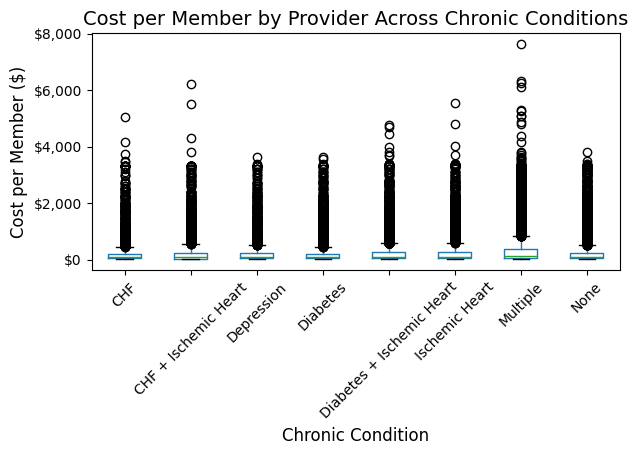

In [123]:
top_combos = bene["chronic_combo"].value_counts().head(8).index
tmp = prov_combo[prov_combo["chronic_combo"].isin(top_combos)].copy()

plt.figure(figsize=(14,6))


tmp.boxplot(
    column="cost_per_member",
    by="chronic_combo",
    rot=45,
    grid=False
)


plt.title("Cost per Member by Provider Across Chronic Conditions", fontsize=14)
plt.suptitle("")
plt.xlabel("Chronic Condition", fontsize=12)
plt.ylabel("Cost per Member ($)", fontsize=12)


import matplotlib.ticker as mtick
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.tight_layout()
plt.show()


In [124]:
prov_combo_2plus = prov_combo[prov_combo["members"] > 1].copy()



In [125]:
dist_stats_2plus = (
    prov_combo_2plus.groupby("chronic_combo")["cost_per_member"]
      .agg(
          providers="count",
          mean="mean",
          median="median",
          p90=lambda s: s.quantile(0.90),
          p95=lambda s: s.quantile(0.95)
      )
      .sort_values("p95", ascending=False)
)

comparison = pd.concat(
    [
        dist_stats.add_suffix("_All"),
        dist_stats_2plus.add_suffix("_2+Members")
    ],
    axis=1
)


for col in comparison.columns:
    if "providers" not in col:
        comparison[col] = comparison[col].round(0)


comparison = comparison.fillna("—")

for col in comparison.columns:
    if "providers" not in col:
        comparison[col] = comparison[col].apply(
            lambda x: int(x) if isinstance(x,(int,float)) else x
        )


comparison["providers_2+Members"] = comparison["providers_2+Members"].apply(
    lambda x: int(x) if isinstance(x,(int,float)) else x
)

comparison.head(10)


,# Providers_All,Avg Cost/Member_All,Median Cost_All,P90 Cost_All,P95 Cost_All,providers_2+Members,mean_2+Members,median_2+Members,p90_2+Members,p95_2+Members
chronic_combo,,,,,,,,,,
Chronic Kidney + Stroke/TIA,33,425,80,800,"3,060",—,—,—,—,—
Osteoporosis + Stroke/TIA,44,346,100,670,"2,120",—,—,—,—,—
Chronic Kidney,1081,389,90,"1,160","2,100",52,340,139,998,1244
Chronic Kidney + Diabetes,1344,405,100,"1,074","2,000",75,372,195,938,1396
Cancer,1363,339,90,900,"1,745",93,375,207,981,1510
Cancer + Osteoporosis,516,321,90,800,"1,612",13,819,420,1837,2038
Chronic Kidney + Ischemic Heart,1238,310,90,800,"1,600",90,294,170,701,1013
Diabetes + Stroke/TIA,285,309,80,700,"1,600",7,744,155,2225,2427
CHF + Chronic Kidney,522,323,90,800,"1,597",10,762,518,1408,1849


<Figure size 1400x600 with 0 Axes>

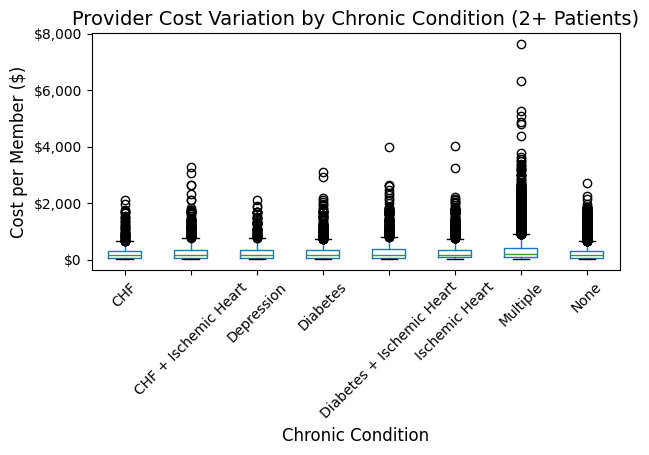

In [126]:
import matplotlib.ticker as mtick

tmp2 = prov_combo_2plus[
    prov_combo_2plus["chronic_combo"].isin(top_combos)
]

plt.figure(figsize=(14,6))

tmp2.boxplot(
    column="cost_per_member",
    by="chronic_combo",
    rot=45,
    grid=False
)

plt.title("Provider Cost Variation by Chronic Condition (2+ Patients)", fontsize=14)
plt.suptitle("")
plt.xlabel("Chronic Condition", fontsize=12)
plt.ylabel("Cost per Member ($)", fontsize=12)


plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter('${x:,.0f}')
)

plt.tight_layout()
plt.show()


In [127]:

if "z_within_combo" not in prov_combo_2plus.columns:
    prov_combo_2plus["z_within_combo"] = (
        prov_combo_2plus
        .groupby("chronic_combo")["cost_per_member"]
        .transform(lambda s: (s - s.mean()) / s.std(ddof=0))
    )


present = prov_combo_2plus.copy()


present["AT_PHYSN_NPI"] = present["AT_PHYSN_NPI"].astype(int)
present["total_cost"] = present["total_cost"].round(0).astype(int)
present["cost_per_member"] = present["cost_per_member"].round(0).astype(int)
present["z_within_combo"] = present["z_within_combo"].round(2)

present = present.reset_index(drop=True)

present.head()


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member,z_within_combo
0,Alzheimer,11222535,200,2,100,-0.52
1,Alzheimer,66576833,860,4,215,-0.12
2,Alzheimer,83923847,110,2,55,-0.68
3,Alzheimer,107817142,910,3,303,0.19
4,Alzheimer,124450587,230,2,115,-0.47


In [128]:
alz = prov_combo_2plus[
    prov_combo_2plus["chronic_combo"] == "Alzheimer"
]


In [129]:
mean_cost = alz["cost_per_member"].mean()
std_cost = alz["cost_per_member"].std(ddof=0)

mean_cost, std_cost


(np.float64(248.32502707876773), 284.4748518883849)

In [130]:
row = alz.iloc[0]

manual_z = (row["cost_per_member"] - mean_cost) / std_cost

manual_z


np.float64(-0.521399435114088)

In [131]:
sample_tbl = prov_combo_2plus.sample(10).copy()


sample_tbl["AT_PHYSN_NPI"] = sample_tbl["AT_PHYSN_NPI"].astype(int)
sample_tbl["total_cost"] = sample_tbl["total_cost"].round(0).astype(int)
sample_tbl["cost_per_member"] = sample_tbl["cost_per_member"].round(0).astype(int)
sample_tbl["z_within_combo"] = sample_tbl["z_within_combo"].round(2)

sample_tbl


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member,z_within_combo
191116,None,9566224631,2890,8,361,0.41
111252,Multiple,2547714823,80,2,40,-0.82
69052,Diabetes + Ischemic Heart,9038812377,3360,2,1680,3.70
99028,Multiple,1129729655,900,2,450,0.37
131083,Multiple,4850658939,440,2,220,-0.30
91228,Multiple,211164798,560,2,280,-0.12
137368,Multiple,5592386021,90,2,45,-0.81
117051,Multiple,3225542671,170,2,85,-0.69
80181,Ischemic Heart,6553376012,80,2,40,-0.73
58708,Diabetes,5443315690,640,3,213,-0.18


In [132]:
provider_score = (
    prov_combo_2plus.groupby("AT_PHYSN_NPI")
      .agg(
          combos_treated=("chronic_combo", "nunique"),
          avg_z=("z_within_combo", "mean"),
          share_high=("z_within_combo", lambda s: (s > 1).mean())
      )
)


provider_score = (
    provider_score[provider_score["combos_treated"] >= 3]
      .sort_values(["avg_z","share_high","combos_treated"], ascending=False)
)


provider_score.index = provider_score.index.astype(int)
provider_score["avg_z"] = provider_score["avg_z"].round(2)
provider_score["share_high"] = provider_score["share_high"].round(2)

provider_score.head(15)


,combos_treated,avg_z,share_high
AT_PHYSN_NPI,,,
9046763744,3,5.28,1.00
682792263,5,4.59,1.00
8402307293,3,4.15,0.33
3377073031,3,3.84,1.00
8330940486,3,3.48,0.67
2726399145,3,3.29,0.67
6699278362,3,3.26,0.67
8537527591,4,3.12,0.75
2371639354,5,3.03,0.60


In [133]:
p = prov_combo_2plus[
    prov_combo_2plus["AT_PHYSN_NPI"] == 9046763744
]


In [134]:
p["z_within_combo"].mean()


np.float64(5.280279775795145)

In [135]:
provider_score.loc[9046763744]


,9046763744
combos_treated,3.00
avg_z,5.28
share_high,1.00


In [136]:
(p["z_within_combo"] > 1).mean()



np.float64(1.0)

In [137]:
provider_score.loc[9046763744]


,9046763744
combos_treated,3.00
avg_z,5.28
share_high,1.00


In [138]:
top_npi = provider_score.index[0]

tbl = (
    prov_combo_2plus[
        prov_combo_2plus["AT_PHYSN_NPI"] == top_npi
    ]
    .sort_values("z_within_combo", ascending=False)
    .head(10)
    .copy()
)


tbl["AT_PHYSN_NPI"] = tbl["AT_PHYSN_NPI"].astype(int)
tbl["total_cost"] = tbl["total_cost"].round(0).astype(int)
tbl["members"] = tbl["members"].astype(int)
tbl["cost_per_member"] = tbl["cost_per_member"].round(0).astype(int)
tbl["z_within_combo"] = tbl["z_within_combo"].round(2)


tbl = tbl.reset_index(drop=True)

tbl


,chronic_combo,AT_PHYSN_NPI,total_cost,members,cost_per_member,z_within_combo
0,Osteoporosis,9046763744,5110,2,2555,6.64
1,Multiple,9046763744,12280,6,2047,5.02
2,None,9046763744,2840,2,1420,4.18


In [139]:

df_cc = df.merge(
    bene[["DESYNPUF_ID","chronic_count"]],
    on="DESYNPUF_ID",
    how="left"
)

cc_cost = (
    df_cc.groupby("chronic_count")["cost"]
         .mean()
         .reset_index()
)

cc_cost["chronic_count"] = cc_cost["chronic_count"].astype(int)
cc_cost["cost"] = cc_cost["cost"].round(0).astype(int)


cc_cost = cc_cost.rename(columns={"cost":"avg_cost"})

cc_cost


,chronic_count,avg_cost
0,0,227
1,1,230
2,2,230
3,3,254
4,4,273
5,5,322
6,6,350
7,7,353
8,8,360
9,9,361


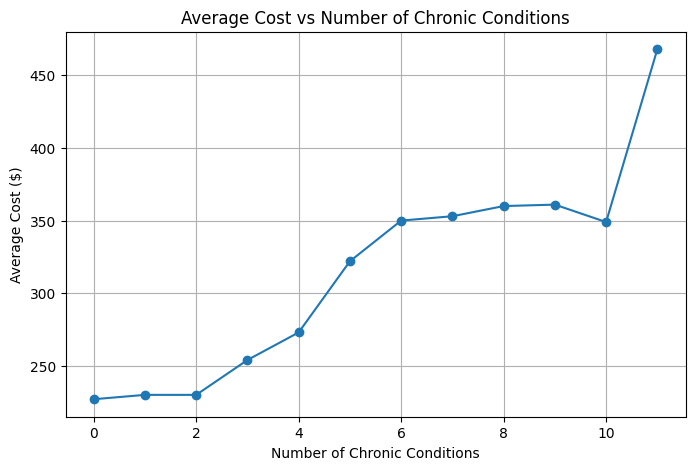

In [140]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(
    cc_cost["chronic_count"],
    cc_cost["avg_cost"],
    marker="o"
)

plt.title("Average Cost vs Number of Chronic Conditions")
plt.xlabel("Number of Chronic Conditions")
plt.ylabel("Average Cost ($)")
plt.grid(True)

plt.show()


In [141]:

df_age = df.merge(
    bene[["DESYNPUF_ID","age"]],
    on="DESYNPUF_ID",
    how="left"
)


df_age["age_group"] = pd.cut(
    df_age["age"],
    bins=[65,70,75,80,85,90,100],
    labels=["65-69","70-74","75-79","80-84","85-89","90+"]
)


age_cost = (
    df_age.groupby("age_group")["cost"]
          .mean()
          .reset_index()
)


age_cost["cost"] = age_cost["cost"].round(0).astype(int)


age_cost = age_cost.rename(columns={"cost":"avg_cost"})

age_cost


/tmp/ipython-input-3091855260.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_age.groupby("age_group")["cost"]


,age_group,avg_cost
0,65-69,281
1,70-74,290
2,75-79,290
3,80-84,304
4,85-89,300
5,90+,302


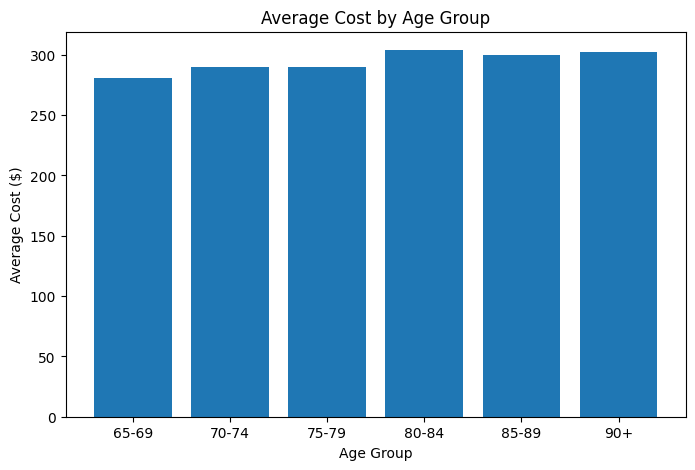

In [142]:
plt.figure(figsize=(8,5))

plt.bar(age_cost["age_group"], age_cost["avg_cost"])

plt.title("Average Cost by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Cost ($)")

plt.show()


In [143]:
#df.to_csv("claims_clean.csv", index=False)
#prov_combo.to_csv("provider_costs.csv", index=False)
#provider_score.to_csv("provider_scores.csv", index=True)


In [144]:
#from google.colab import files

#files.download("claims_clean.csv")
#files.download("provider_costs.csv")
#files.download("provider_scores.csv")
